# ĐỒ ÁN: Xử lý ngôn ngữ tự nhiên
Đinh Hoàng Linh Đan     - 19521309
Trần Nguyễn Quỳnh Anh   - 19521217  

In [1]:
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import math
import ast
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Dataset

In [3]:
sentences = open('C:\\Users\Admin\\CS221.M11-POS_TAGGING_VIETNAMESE\\Dataset\\dataset.txt', encoding='utf-8').readlines()
tokenize_sentences = [sentence.split(' ') for sentence in sentences]

In [4]:
print('Số lượng câu trong Dataset:', len(sentences))
#sentences[0:len(sentences)]

Số lượng câu trong Dataset: 40


# Tách từ bằng Longest Matching

In [5]:
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    
    patterns = []
    patterns.extend([word, non_word, digits])
    patterns = f"({'|'.join(patterns)})"
    
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

In [6]:
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

In [8]:
def longest_matching(sentence, two, three):
    syllables = syllablize(sentence)
    syl_len = len(syllables)
    
    curr_id = 0
    word_list = []
    done = False
    
    while (curr_id < syl_len) and (not done):
        curr_word = syllables[curr_id]
        if curr_id >= syl_len - 1:
            word_list.append(curr_word)
            done = True
        else:
            next_word = syllables[curr_id + 1]
            pair_word = ' '.join([curr_word.lower(), next_word.lower()])
            if curr_id >= (syl_len - 2):
                if pair_word in two:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
            else:
                next_next_word = syllables[curr_id + 2]
                triple_word = ' '.join([pair_word, next_next_word.lower()])
                if triple_word in three:
                    word_list.append('_'.join([curr_word, next_word, next_next_word]))
                    curr_id += 3
                elif pair_word in two:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
    return word_list

In [9]:
two_word = load_n_grams('Resource\\two_word.txt')
three_word = load_n_grams('Resource\\three_word.txt')
longest_matching('Hãy tách khỏi quá khứ và chôn vùi nó.', two_word, three_word)

['Hãy', 'tách', 'khỏi', 'quá_khứ', 'và', 'chôn_vùi', 'nó', '.']

In [10]:
with open('Tokens\\Longest_Matching_Tokens.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        word_list = longest_matching(sentence, two_word, three_word)
        longest_matching_sentences.append(' '.join(word_list))
        for word in word_list: f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
longest_matching_sentences[0:3]

['Tương_lai là hôm_nay .',
 'Hãy tách khỏi quá_khứ và chôn_vùi nó .',
 'Nhưng ta hoàn_toàn không cần phải lo_lắng .']

In [11]:
count_longest_matching_compounds = 0
for sentence in longest_matching_sentences:
    for word in sentence.split():
        if '_' in word: count_longest_matching_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching:', count_longest_matching_compounds)

Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching: 166


# Tách từ bằng VnCoreNLP

In [6]:
%pip install vncorenlp

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [42]:
from vncorenlp import VnCoreNLP

In [47]:
client = VnCoreNLP(address='http://127.0.0.1', port=9001)

In [48]:
with open('Tokens\\vncore_tokens.txt', 'w', encoding='utf-8') as f:
    vncore_sentences = []
    for sentence in sentences:
        word_list = client.tokenize(sentence)[0]
        vncore_sentences.append(' '.join(word_list))
        for word in word_list: f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
vncore_sentences[0:3]

['Tương_lai là hôm_nay .',
 'Hãy tách khỏi quá_khứ và chôn vùi nó .',
 'Nhưng ta hoàn_toàn không cần phải lo_lắng .']

In [49]:
count_vncore_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 162


# Tách từ thủ công

In [13]:
with open('Tokens\manual_token.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else: sentence += word.replace('\n', ' ')
manual_tokenize_sentences[0:3]

['Tương_lai  là  hôm_nay .',
 'Hãy  tách  khỏi  quá_khứ  và  chôn_vùi  nó .',
 'Nhưng  ta  hoàn_toàn  không  cần  phải  lo_lắng .']

In [14]:
count_manual_tokenize_compounds = 0
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_manual_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 171


# Đánh giá kết quả tách từ

In [15]:
def count_correct_words(pred, source, n_grams=3):
    pred_words = pred.split()
    source_words = source.split()
    
    total_true, tp = 0, 0
    total_errors, fp = 0, 0
    
    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]: 
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1
    
    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]: 
            del source_words[idx]
        else: idx += 1
    
    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words
    
    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1 
            total_true += 1
                    
    return total_true, total_errors, tp, fp

In [16]:
def tokenize_evaluation(pred, source, n_grams=3):
    total_true = 0
    total_errors = 0
    total_words = 0
    
    pred_tp = 0
    pred_fp = 0
    
    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true 
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words, 
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp, 
        'False Positive': pred_fp,
        'Total True': total_true, 
        'Total Errors': total_errors
    }

In [51]:
longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokenize_sentences)
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)
pd.DataFrame(
    [longest_matching_evaluation, vncore_evaluation], 
    index = ['Longest Matching', 'VnCoreNLP']
).astype(object).T


,Longest Matching,VnCoreNLP
Accuracy,0.079855,0.07804
Precision,0.090361,0.08642
Recall,0.087719,0.081871
True Positive,15,14
False Positive,151,148
Total True,44,43
Total Errors,535,537


# Tạo ngữ liệu

In [19]:
manual_tokens = open('Tokens\\manual_token.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(manual_tokens))
manual_tokens[0:5]

Số lượng từ: 620


['Tương_lai \n', 'là \n', 'hôm_nay\n', '.\n', '\n']

In [21]:
longest_matching_tokens = open('Tokens\\Longest_Matching_Tokens.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(longest_matching_tokens))
longest_matching_tokens[0:5]

Số lượng từ: 619


['Tương_lai\n', 'là\n', 'hôm_nay\n', '.\n', '\n']

# Gán nhãn bằng VnCoreNLP

In [26]:
with open('Dataset\\label.txt', 'w', encoding='utf-8') as f:
    for word in manual_tokens:
        word = word.replace('\n', '')
        
        if '_' not in word: tag = client.pos_tag(word)
        else: tag = client.pos_tag(word.replace('_', ' '))
        
        if tag == []: f.write('\n')
        else: f.write(f'{word}\t{tag[0][0][1]}\n')
    f.write('\n')

# Chia dữ liệu thành tập Train và Test

In [22]:
label = open('Dataset\\label.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']

In [23]:
with open('Dataset\\label_train.txt', 'w', encoding='utf-8') as f:
    for line in label[:new_line_idx[32]]: f.write(line)
    f.write('\n')
    
with open('Dataset\\label_test.txt', 'w', encoding='utf-8') as f:
    for line in label[new_line_idx[32] + 1:]: f.write(line)

In [24]:
with open('Dataset\\train_words.txt', 'w', encoding='utf-8') as f:
    for line in label[:new_line_idx[32]]: f.write(re.sub('\t.*', '', line))
    f.write('\n')        
    
with open('Dataset\\test_words.txt', 'w', encoding='utf-8') as f:
    for line in label[new_line_idx[32] + 1:]: f.write(re.sub('\t.*', '', line))

# Đọc dữ liệu

In [53]:
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()
    
    for index, word in enumerate(file):
        if not (word.lower()).split():
            word = '--n--'
            data.append(word)
            continue
        elif (word.lower()).strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [26]:
def plot_tag_counts(label):
    tags = [word_tag.split()[1] for word_tag in label if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

# Vocabs

In [27]:
vocabs = open('Resource\\vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs): 
    if word not in vocabs_dict: 
        vocabs_dict[word] = index  
        index += 1

In [28]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 20: break

Số lượng từ vựng: 54817
!: 0
": 1
#: 2
$: 3
%: 4
&: 5
': 6
'': 7
'40s: 8
'60s: 9
'70s: 10
'80s: 11
'86: 12
'90s: 13
'N: 14
'S: 15
'd: 16
'em: 17
'll: 18
'm: 19
'n': 20


# Tập Train

In [29]:
label_train = open('Dataset\\label_train.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập label_train:', len(label_train))
label_train[0:5]

Số lượng từ trong tập label_train: 468


['Tương_lai \tNp\n', 'là \tV\n', 'hôm_nay\tN\n', '.\tCH\n', '\n']

In [54]:
train_words = preprocess(vocabs_dict, 'Dataset\\train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))
train_words[0:5]

Số lượng từ trong tập train_words: 468


['Tương_lai', 'là', 'hôm_nay', '.', '--n--']

Các từ không nằm trong vocabs: chôn_vùi, nỗi_buồn, mệnh_mông, bất, như_thế, hủy_hoại, xảy_ra, tìm_ra, không_được, chuyện_gì, xảy_ra, tạo_ra, đáng_ngạc_nhiên, 45kg, Người_chồng, thứ_nhất, sau_khi, sức_lực., Hiếm_khi, gì_đó, gây_ra, buồn_chán, nể_phục, không_hề, không_biết, 1/3, người_lính, leo_núi, khỏe_mạnh, đó., Tùy, lo, đem_lại, 

,V,N,A,CH,P,R,E,L,C,Cc,M,Np,Nc,X,tận,T,lắng,Total
0,120,71,44,39,36,33,32,16,11,10,8,6,2,2,1,1,1,433


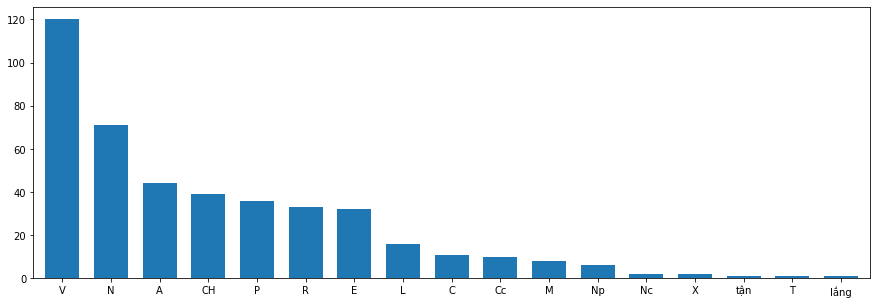

In [58]:
print('Các từ không nằm trong vocabs', end=': ')
for word_tag, word in zip(label_train, train_words):
    if word == '--unk--': print(word_tag.split()[0], end=', ')
plot_tag_counts(label_train)

# Tập Test

In [32]:
label_test = open('Dataset\\label_test.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test:', len(label_test))
label_test[0:5]

Số lượng từ trong tập test: 153


['Nếu \tC\n', 'bạn \tN\n', 'không \tR\n', 'có \tV\n', 'một \tM\n']

In [56]:
test_words = preprocess(vocabs_dict, 'Dataset\\test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 153


['Nếu', 'bạn', 'không', 'có', 'một']

In [57]:
print('Các từ không nằm trong vocabs', end=': ')
for word_tag, word in zip(label_test, test_words):
    if word == '--unk--': print(word_tag.split()[0], end=', ')
#plot_tag_counts(label_test)

Các từ không nằm trong vocabs: tín, vất, thư, biện, thể, tốt_nhất, gây, có, 

Part of Speech Tagging

In [37]:
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: word = '--unk--'
    return word, tag

In [38]:
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts


In [59]:
transition_counts, emission_counts, tag_counts = create_dictionaries(label_train, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)


ValueError: too many values to unpack (expected 2)

In [41]:
print("Transition examples: ")
for example in list(transition_counts.items())[:3]:
    print(example)

Transition examples: 


NameError: name 'transition_counts' is not defined

In [ ]:
print("Emission examples: ")
for example in list(emission_counts.items())[:3]:
    print (example)


# Training

In [41]:
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: word = '--unk--'
    return word, tag

In [42]:
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

In [43]:
transition_counts, emission_counts, tag_counts = create_dictionaries(label_train, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

ValueError: too many values to unpack (expected 2)

# Testing

In [ ]:
def predict_pos(words, gold, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())
    
    for word, gold_tuple in zip(words, gold): 
        gold_tuple_list = gold_tuple.split()
        if len(gold_tuple_list) != 2: continue
        else: true_label = gold_tuple_list[1]
    
        count_final = 0
        pos_final = ''
        if word not in vocabs_dict: continue
        
        for pos in states:
            if (pos, word) not in emission_counts: continue
            count = emission_counts[(pos, word)]
            
            if count > count_final:
                count_final = count
                pos_final = pos
                    
        if pos_final == true_label: num_correct += 1
    accuracy = num_correct / len(gold)
    return accuracy